In [245]:
import pandas as pd
import matplotlib.pyplot as plt

SESSION = ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']
COLUMNS = ["NaN", "NaN.1", "NaN.2", "NaN.3", "NaN.4", "NaN.5", "NaN.6",
           "NaN.7", "NaN.8", "NaN.9", "NaN.10", "NaN.11", "NaN.12"]
THRESHOLD_MOVEMENT = 10000

#CHANGE THIS FOR EACH PARTICIPANT "Impulse_participant_x.txt"
PARTICIPANT = 'Impulse_participant_1.txt'

In [291]:
def insert_comma():
    for i in range(0, 5):
        with open(SESSION[i], 'r') as data:
            txt = data.read()
        txt = txt.replace(' ', ',')

        with open (SESSION[i], 'w') as add_col:
            add_col.write('time,acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,force,NaN,NaN,NaN,NaN,NaN\n')

        with open(SESSION[i], 'a') as replace:
            replace.write(txt)
                          
def plot(session):
    mov = session.ix[:, 1]
    force = session.ix[:, 2]
    mov.plot()
    force.plot()
    plt.show()
    
def increment_index(indexCounter, movement_lst):
    for ix in range(0, 1000):
        if movement_lst[ix] < 8500:
            #print(movement_lst[ix])
            #print(indexCounter)
            return indexCounter + 20
        indexCounter += 1  

        #This needs to return one value not a list.
def get_impulse(time, force):
    impulse = []
    return_impulse = 0
    for ix in range(0, 5):
        impulse.append(force[ix] * time[ix])
    return impulse
    
#16000 is max
def get_newtonValue(min_force, max_force):
    force = 0
    total_force = []
    newton_force = []
    percentage = 0
    
    for ix in range(0, 5):
        force = min_force[ix] + max_force[ix]
        total_force.append(force / 2)
        
        #This might change
    for ixx in range(0, 5):
        percentage = total_force[ixx]
        percentage = percentage / 16384
        newton_force.append(percentage * 98)
    return newton_force

def get_time(t1, t2):
    time = []
    for ix in range(0, 5):
        time.append((t2[ix]/1000) - (t1[ix]/1000))
    return time

def get_min_max(session):
    force_lst = session['force'].tolist()
    move_lst = session['acc'].tolist()
    time_lst = session['time'].tolist()
    
    indexCnt = 0
    indexCnt_holder = 0
    FORCE_min = []
    FORCE_max = []
    t_1 = []
    t_2 = []
    counter = 0
    for i in range(0, len(move_lst)):
        if indexCnt == len(force_lst) - 1 or indexCnt == len(move_lst) - 1 or counter == 5:
            break
        if move_lst[indexCnt] > THRESHOLD_MOVEMENT:
            FORCE_max.append(force_lst[indexCnt-20])
            t_2.append(time_lst[indexCnt])
            indexCnt_holder = indexCnt
            for ix in range(1000, 1, -1):
                if force_lst[indexCnt] < 3500:
                    FORCE_min.append(force_lst[indexCnt])
                    t_1.append(time_lst[indexCnt])
                    indexCnt = increment_index(indexCnt_holder, move_lst) + 50
                    break
                indexCnt -= 1
        indexCnt += 1
        
    ff = get_newtonValue(FORCE_min, FORCE_max)
    tt = get_time(t_1, t_2)
    impulse = get_impulse(tt, ff)
    
    impulse_return = 0
    for ixx in range(0, 5):
        impulse_return += impulse[ixx]
    impulse_return = impulse_return / 5
    return int(impulse_return)


C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


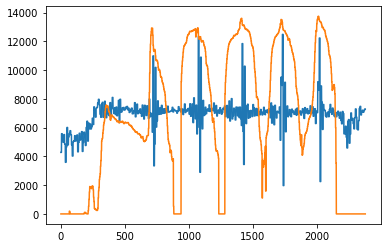

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


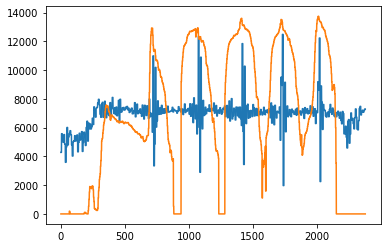

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


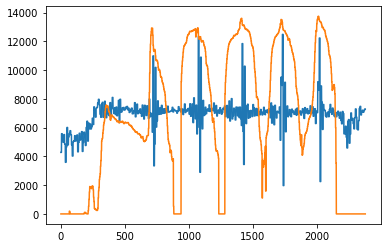

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


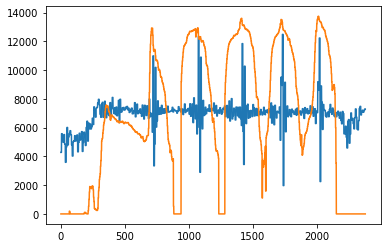

C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Brockzter\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


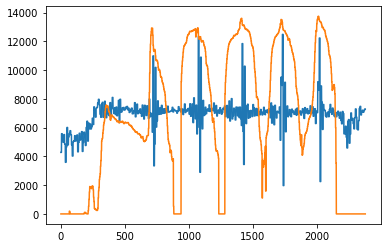

In [243]:
#Insert comma into text file. RUN ONLY ONCE comment this function out after the first run.
#insert_comma()

#Convert the new csv files to pd dataframes
session1 = pd.read_csv(SESSION[0])
session2 = pd.read_csv(SESSION[1])
session3 = pd.read_csv(SESSION[2])
session4 = pd.read_csv(SESSION[3])
session5 = pd.read_csv(SESSION[4])

#Remove excess columns
session1 = session1.drop(columns=COLUMNS)
session2 = session2.drop(columns=COLUMNS)
session3 = session3.drop(columns=COLUMNS)
session4 = session4.drop(columns=COLUMNS)
session5 = session5.drop(columns=COLUMNS)

#Plot sessions
plot(session1)
plt.show()

plot(session2)
plt.show()

plot(session3)
plt.show()

plot(session4)
plt.show()

plot(session5)
plt.show()

In [295]:
imp1 = get_min_max(session1)
imp2 = get_min_max(session2)
imp3 = get_min_max(session3)
imp4 = get_min_max(session4)
imp5 = get_min_max(session5)

with open(PARTICIPANT, 'w') as txt:
    txt.write(str(imp1))
    txt.write(", ")
    txt.write(str(imp2))
    txt.write(", ")
    txt.write(str(imp3))
    txt.write(", ")
    txt.write(str(imp4))
    txt.write(", ")
    txt.write(str(imp5))